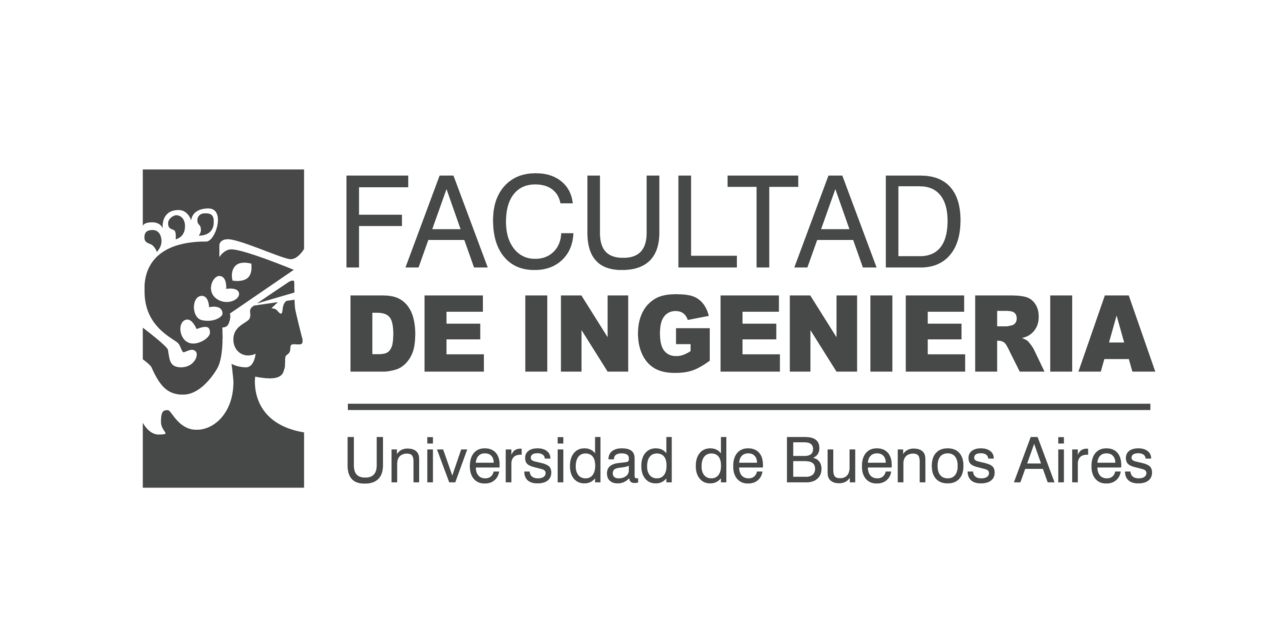

**Profesores:** <br />
Ing. Maxim Dorogov - mdorogov@fi.uba.ar <br />
Esp. Ing. Leandro Torrent - ingtorrentleandro@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Mg. Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/VpC1-TP3 <br />

# TP 3: Enunciado

▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.


## Imports

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import os
import glob

# Desarrollo del Trabajo Práctico

## Punto 1

In [29]:
def matching(img, template, params):    
# Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    template_resized = cv.resize(template, (params[0], params[1]))
    if params[2]:
        template_resized = 255 - template_resized
    w, h = template_resized.shape[::-1]
    img_salida = img.copy()
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img[:, :, 2], template_resized, cv.TM_CCOEFF_NORMED) # Busco el canal rojo
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    score = max_val
    top_left = max_loc
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, (0, 255, 0), 2)
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()
    display(f"Score: {score}")

['data/images\\coca_logo_1.png', 'data/images\\coca_logo_2.png', 'data/images\\coca_multi.png', 'data/images\\coca_retro_1.png', 'data/images\\coca_retro_2.png', 'data/images\\logo_1.png']


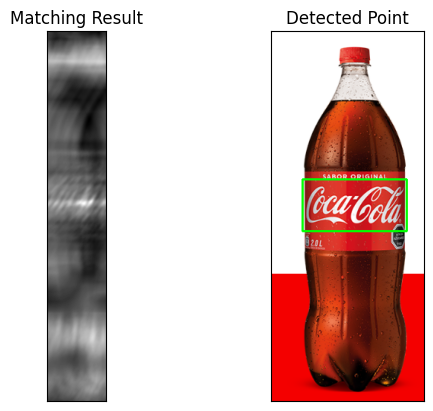

'Score: 0.3034612536430359'

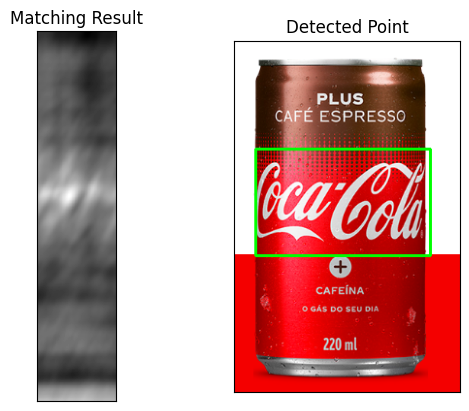

'Score: 0.2896941900253296'

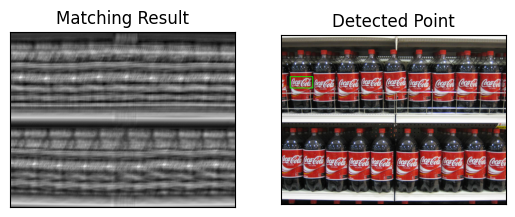

'Score: 0.5213674902915955'

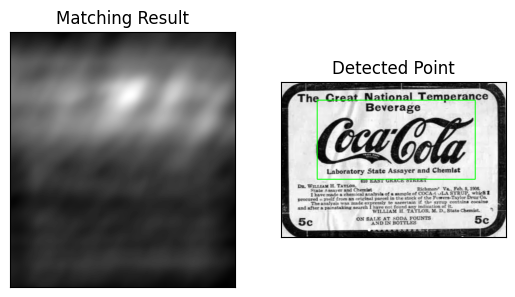

'Score: 0.4373584985733032'

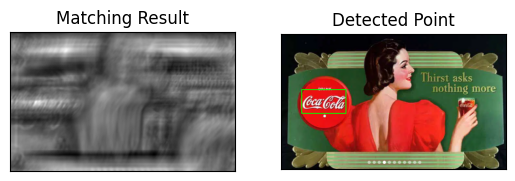

'Score: 0.4728694260120392'

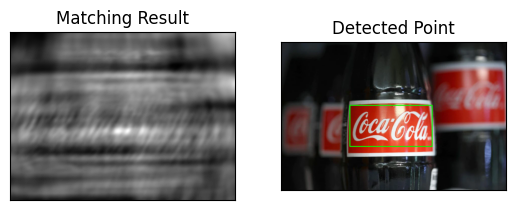

'Score: 0.375218003988266'

In [30]:
def list_png_files(folder_path):
    # Use glob to find all .png files in the folder
    png_files = glob.glob(os.path.join(folder_path, "*.png"))
    return png_files

folder_path = "data/images"
png_files = list_png_files(folder_path)
print(png_files)

dict_template_size = {
    'data/images\\coca_logo_1.png' : [140, 70, 1],
    'data/images\\coca_logo_2.png': [180, 110, 1],
    'data/images\\coca_multi.png': [80, 40, 1],
    'data/images\\coca_retro_1.png': [500, 250, 0],
    'data/images\\coca_retro_2.png': [140, 75, 1],
    'data/images\\logo_1.png': [250, 125, 1]
}

template = cv.imread('data/template/pattern.png')
template = template[:, :, 0]

for file in png_files:
    img = cv.imread(file)
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    matching (img_rgb, template, dict_template_size[file])   

## Punto 2

In [31]:
def matching_multi(img, template, params):    
# Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    template_resized = cv.resize(template, (params[0], params[1]))
    if params[2]:
        template_resized = 255 - template_resized
    w, h = template_resized.shape[::-1]
    img_salida = img.copy()
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img[:, :, 2], template_resized, cv.TM_CCOEFF_NORMED) # Busco el canal rojo
       # Calculamos el umbral como el valor medio de la matriz resultante
    _, max_val, _, _ = cv.minMaxLoc(res)
    threshold = max_val * 0.83
    # Obtenemos todas las ubicaciones donde el score es mayor o igual al umbral
    loc = np.where(res >= threshold)
    # Para cada coordenada encontrada, dibujamos un rectángulo
    for pt in zip(*loc[::-1]):  # loc[::-1] invierte el orden para obtener (x, y)
        bottom_right = (pt[0] + w, pt[1] + h)
        cv.rectangle(img_salida, pt, bottom_right, (0, 255, 0), 1)
    
    score = np.mean(res[loc])
    print(f"Score all the image: {score}")
    print(f"Threshold for matching: {threshold}")
    # Graficamos los resultados:
    # (1) La matriz de resultados de la coincidencia
    # (2) La imagen original con todos los rectángulos dibujados
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(img_salida)
    plt.title('Detected Points')
    plt.xticks([]), plt.yticks([])
    plt.show()

['data/images\\coca_logo_1.png', 'data/images\\coca_logo_2.png', 'data/images\\coca_multi.png', 'data/images\\coca_retro_1.png', 'data/images\\coca_retro_2.png', 'data/images\\logo_1.png']
Score all the image: 0.45925313234329224
Threshold for matching: 0.4327350169420242


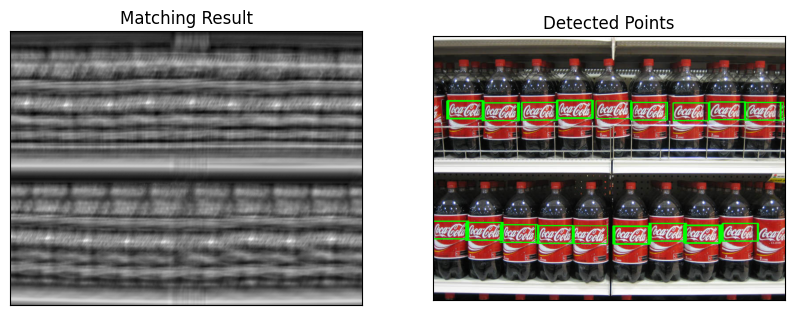

In [35]:
folder_path = "data/images"
png_files = list_png_files(folder_path)
print(png_files)

dict_template_size = {
    'data/images\\coca_multi.png': [80, 40, 1],
}

template = cv.imread('data/template/pattern.png')
template = template[:, :, 0]
img = cv.imread('data/images/coca_multi.png')
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)

matching_multi(img_rgb, template, [80, 40, 1]) 
 

### Punto 3

In [11]:
def apply_template_matching(img, template, params):    
# Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    template_resized = cv.resize(template, (params[0], params[1]))
    if params[2]:
        template_resized = 255 - template_resized
    # img_salida = img.copy()
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img[:, :, 2], template_resized, cv.TM_CCOEFF_NORMED) # Busco el canal rojo
       # Calculamos el umbral como el valor medio de la matriz resultante
    return res

def get_max_loc(res, threshold_mul=0.83):
    _, max_val, _, _ = cv.minMaxLoc(res)
    threshold = max_val * threshold_mul
    # Obtenemos todas las ubicaciones donde el score es mayor o igual al umbral
    loc = np.where(res >= threshold)
    score = np.mean(res[loc])
    return score, threshold, loc

def box_plots(img, template, loc):
    w, h = template.shape[::-1]
    # Para cada coordenada encontrada, dibujamos un rectángulo
    for pt in zip(*loc[::-1]):  # loc[::-1] invierte el orden para obtener (x, y)
        bottom_right = (pt[0] + w, pt[1] + h)
        cv.rectangle(img, pt, bottom_right, (0, 255, 0), 1)
    return img

    print(f"Score all the image: {score}")
    print(f"Threshold for matching: {threshold}")
    # Graficamos los resultados:
    # (1) La matriz de resultados de la coincidencia
    # (2) La imagen original con todos los rectángulos dibujados
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(img_salida)
    plt.title('Detected Points')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [26]:
template = cv.imread('data/template/pattern.png')
template = template[:, :, 0]
template = cv.resize(template, (500, 250))
img = cv.imread('data/images/coca_multi.png')
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

base = template
piramide_gauss = [template]
for i in range(3):
    base = cv.pyrDown(base)
    piramide_gauss.append(base)

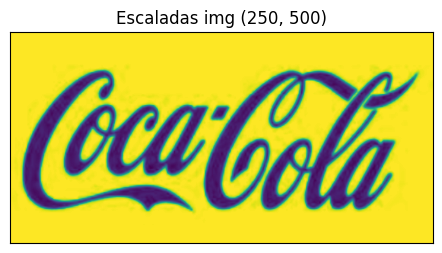

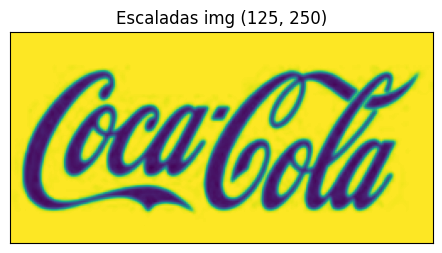

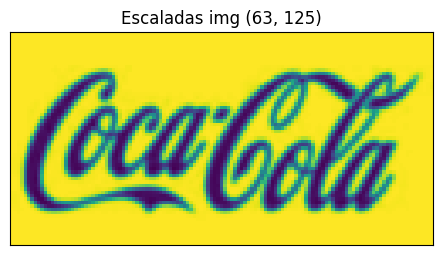

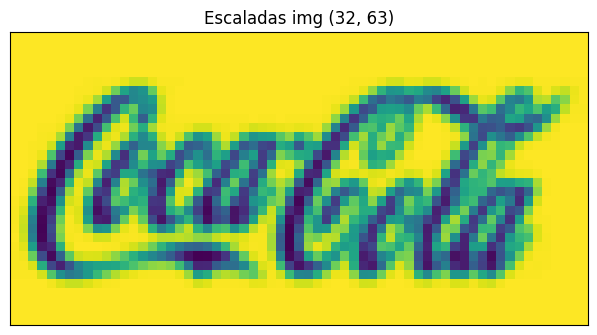

In [27]:
for img in piramide_gauss:
    # Suponiendo que img_rgb, img_nivel_1, img_nivel_2, img_nivel_3 ya están definidas
    plt.figure(figsize=(12, 8))

    # Imagen Original
    plt.subplot(2, 2, 1)  # 2x2 grid, primer subplot
    plt.imshow(img)
    plt.title(f"Escaladas img {img.shape}")
    plt.xticks([]), plt.yticks([])
plt.tight_layout()  # Ajusta el layout para que no se sobrepongan los títulos y ejes
plt.show()